# Guided Capstone Step 6 Documentation

**The Data Science Method**  


1.   Problem Identification 

2.   Data Wrangling 
  
3.   Exploratory Data Analysis 
 
4.   Pre-processing and Training Data Development

5.  Modeling

6.   **Documentation**
  * Review the Results
  * Finalize Code 
  * Finalize Documentation
  * Create a Project Report 
  * Create a Slide Deck for the Executive Audience

In this guided capstone we are going to revisit many of the actions we took in the previous guided capstone steps. This gives you the opportunity to practice the code you wrote to solve the questions in step 4 and 5. 

**<font color='teal'> Start by loading the necessary packages and printing out our current working directory just to confirm we are in the correct project directory. </font>**

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import explained_variance_score,mean_absolute_error
from sklearn.ensemble import RandomForestRegressor

## Fit Models with Training Data Set

**<font color='teal'> Using sklearn fit the model you chose in Guided Capstone 5 on your training dataset. This includes: creating dummy features for states if you need them, scaling the data,and creating train and test splits before fitting the chosen model.Also, remember to generate a model performance score(MAE, or explained variance) based on the testing hold-out data set.</font>**

#### Best Model 

I'll be using model3 from the previous step. Model3 is a linear regression model for predicting the Aldult Weekend ticket prices based on the features of the parks. This step discards a couple of features that management can't control or modify. These include the state, summit_elev and base_elev. 

In [42]:
df_ski = pd.read_csv('step3_output.csv', index_col=0)
df_ski.head()

,Name,state,summit_elev,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Clusters
0,Alyeska Resort,Alaska,3939,2500,1,0,0,2,2,0,...,1610,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550,1
1,Eaglecrest Ski Area,Alaska,2600,1540,0,0,0,0,0,0,...,640,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0,1
2,Hilltop Ski Area,Alaska,2090,294,0,0,0,0,0,1,...,30,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30,1
3,Arizona Snowbowl,Arizona,11500,2300,0,0,1,0,2,2,...,777,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0,0
4,Sunrise Park Resort,Arizona,11100,1800,0,0,0,1,2,3,...,800,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80,0


In [43]:
#First we make sure to drop the features we won't be using from our dataframe
discard= ['Name','state', 'summit_elev']

In [44]:
df = df_ski.drop(columns=discard, axis=1)
df.head()

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,AdultWeekend,projectedDaysOpen,NightSkiing_ac,Clusters
0,2500,1,0,0,2,2,0,0,2,7,...,1610,113.0,150.0,60.0,669.0,65.0,85.0,150.0,550,1
1,1540,0,0,0,0,0,0,4,0,4,...,640,60.0,45.0,44.0,350.0,47.0,53.0,90.0,0,1
2,294,0,0,0,0,0,1,0,2,3,...,30,30.0,150.0,36.0,69.0,30.0,34.0,152.0,30,1
3,2300,0,0,1,0,2,2,1,2,8,...,777,104.0,122.0,81.0,260.0,89.0,89.0,122.0,0,0
4,1800,0,0,0,1,2,3,1,0,7,...,800,80.0,115.0,49.0,250.0,74.0,78.0,104.0,80,0


In [45]:
#We now move on to creating our y and x varibles to use in the model
#y will be the dependent variable we're trying to predict, AdultWeekend
#x will be composed of remaining independent variables in our dataframe after they've been scaled
feat_var = list(df.columns)
feat_var.pop(feat_var.index('AdultWeekend'))


'AdultWeekend'

In [46]:
y = df['AdultWeekend']
x = df[feat_var]

#We need to create a StandardScaler object and then fit our x to it
sc = preprocessing.StandardScaler()
x_scaled = sc.fit_transform(x)

In [47]:
#x_scaled[:10]
#'AdultWeekend' in feat_var

In [48]:
#We'll now split our data. We'll train our model with 75% of the data and then test it against the remaining 25% of our data
X_train, X_test, y_train, y_test = model_selection.train_test_split(x_scaled, y, test_size=0.25, random_state=0)

In [49]:
#y_test

In [50]:
X_test[0]

array([-1.04513212, -0.30945373, -0.05521576, -0.2845439 , -0.46472896,
       -0.71396216,  0.92481857, -1.0118062 , -0.30623781, -0.56851793,
       -0.54389983,  0.09708526, -1.07467815, -0.52618075, -0.39142541,
       -1.61946732,  0.43036578, -0.07271767,  0.00268459, -0.66097593,
        0.24553752, -0.1177603 ])

In [51]:
#Now we'll create a regressor, fit our trained data to the model and then compared our tested data against what's being
#predicted by the model
lm = linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

#We can use lm in order to get y_pred
y_pred = lm.predict(X_test)

#We then have to measure the difference between y_pred and y_test
print(explained_variance_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))

0.9099055055651349
5.005431098067094


In [52]:
y_pred

array([ 62.82927207,  36.292498  ,  53.70616018,  38.8696261 ,
        51.83751306,  71.61561698, 108.4149039 ,  54.19414322,
        64.63241155,  45.91166463, 118.16742471,  78.47038059,
        87.69297693,  50.32942949,  88.31699894,  40.08029469,
        87.80813815,  61.65296364,  59.31592017,  51.18556838,
        56.81889283,  60.91684323,  82.84711122,  60.80923928,
        52.63240712,  70.68243615,  35.66711785,  50.82749482,
        74.1046397 ,  60.29755432,  59.27591227,  51.21298638,
        51.26924623,  60.45411706,  64.59624243,  36.24815448,
        46.85353088,  76.67835645,  55.76056377,  53.60311755,
        52.82745627,  66.81621435,  67.2724825 , 164.06880893,
        62.44465092,  59.14207338,  84.75217974,  82.26133568,
        38.27836572,  67.01193682,  70.38687908,  45.77028014,
        36.24175292,  79.51049034,  71.87350374,  80.26856108,
        45.54779329,  59.30798667, 114.03038641,  62.75200421,
        76.42664066,  59.04915689,  42.19735167,  64.67

In [53]:
#We'll now take a look at the intercept of the model
#We'll also look into the coefficients in order to see which features are weighing more heavily in our model

print('Model\'s intercept: ',lm.intercept_)

#function for getting the attributes with the top ten coefficients
#Takes a list with the name of the features and an array with the corresponding coefficients
def feature_coef(lst, arry):
    co_dict = {'feature':[], 'coef':[]}
    for feat, coef in zip(lst, arry):
        co_dict['feature'].append(feat)
        co_dict['coef'].append(abs(coef))
    df_tst = pd.DataFrame(co_dict)
    return df_tst.sort_values(by=['coef'], ascending=False).head(10)

feature_coef(x.columns, lm.coef_)

Model's intercept:  63.90749787636485


,feature,coef
18,AdultWeekday,19.684040
13,SkiableTerrain_ac,2.170864
5,quad,1.476765
20,NightSkiing_ac,1.445014
6,triple,1.366631
21,Clusters,1.039030
15,daysOpenLastYear,1.019666
8,surface,0.953346
4,fastQuads,0.898182
17,averageSnowfall,0.882908


## Review the results 

**<font color='teal'> Now, let's predict the Big Mountain Weekend price with our model in order to provide a recommendation to our managers on how to price the `AdultWeekend` lift ticket. First we need to find the row for Big Mountain resort in our data using string contains or string matching.</font>**

In [56]:
df_bmr = df_ski[df_ski['Name'].str.contains('Big Mountain')]

**<font color='teal'> Prepare the Big Mountain resort data row as you did in the model fitting stage.</font>**

In [57]:
discard.append('AdultWeekend')

In [58]:
df_bmr = df_bmr.drop(columns=discard, axis=1)
df_bmr

,vertical_drop,trams,fastEight,fastSixes,fastQuads,quad,triple,double,surface,total_chairs,...,LongestRun_mi,SkiableTerrain_ac,Snow Making_ac,daysOpenLastYear,yearsOpen,averageSnowfall,AdultWeekday,projectedDaysOpen,NightSkiing_ac,Clusters
151,2353,0,0,0,3,2,6,0,3,14,...,3.3,3000,600.0,123.0,72.0,333.0,81.0,123.0,600,2


In [17]:
tst = df_ski[df_ski['Name'].str.contains('Sunrise')]
discard_tst = discard+['AdultWeekend']
tst= tst.drop(columns=discard_tst, axis=1)

In [59]:
#We only need to transform the data for Big Mountain Resort. When we used sc.fit_transform() earlier
#The scalar object recorded the mean and std of every column, fit part.
#Here we just need to genererate the z-scores for every column of BMR using transform
bmr_x_scaled = sc.transform(bmr_x)
bmr_x_scaled

array([[ 1.21337704, -0.30945373, -0.05521576, -0.2845439 ,  0.90041235,
         0.81132064,  2.78009483, -1.0118062 ,  0.18048799,  0.9872876 ,
         1.23468558,  0.63882102,  1.62720919,  2.14306626,  1.75397632,
         0.25196   ,  0.85098883,  1.11617761,  0.96969874,  0.10972896,
         5.81226939,  1.49653716]])

**<font color='teal'> Predict the Big Mountain resort `Adult Weekend` price and print it out.</font>** This is our expected price to present to management. Based on our model given the characteristics of the resort in comparison to other ski resorts and their unique characteristics.

In [83]:
y_bmr = lm.predict(bmr_x_scaled)
print(y_bmr)

[90.87360612]


**<font color='teal'> Print the Big Mountain resort actual `Adult Weekend` price.</font>**

In [85]:
print(df_ski[df_ski['Name'].str.contains('Big Mountain')]['AdultWeekend'])

151    81.0
Name: AdultWeekend, dtype: float64


**<font color='teal'> As part of reviewing the results it is an important step to generate figures to visualize the data story. We can use the clusters we added to our data frame to create scatter plots for visualizing the Adult Weekend values compared to other characteristics. Run the example below to get you started and build two or three more figures to include in your data story telling.</font>**

In [64]:
df_bmr_f = df_ski[df_ski['Name'].str.contains('Big Mountain')]

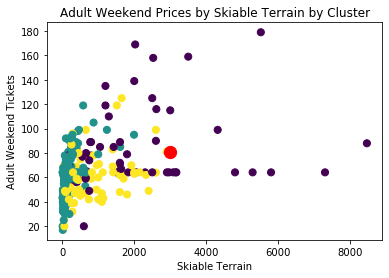

In [110]:
plt.scatter(df_ski['SkiableTerrain_ac'], df_ski['AdultWeekend'], c=df_ski['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_bmr_f['SkiableTerrain_ac'], df_bmr_f['AdultWeekend'], c='red', s=150)
plt.xlabel('Skiable Terrain')
plt.ylabel('Adult Weekend Tickets')
plt.title('Adult Weekend Prices by Skiable Terrain by Cluster')
plt.savefig('fig1.png',bbox_inches='tight')

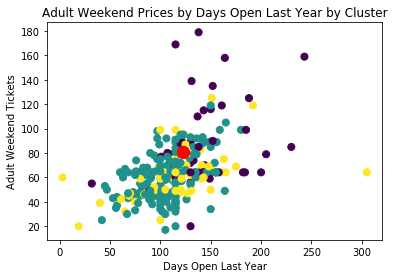

In [111]:
plt.scatter(df_ski['daysOpenLastYear'], df_ski['AdultWeekend'], c=df_ski['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_bmr_f['daysOpenLastYear'], df_bmr_f['AdultWeekend'], c='red', s=150)
plt.xlabel('Days Open Last Year')
plt.ylabel('Adult Weekend Tickets')
plt.title('Adult Weekend Prices by Days Open Last Year by Cluster')
plt.savefig('fig2.png',bbox_inches='tight')

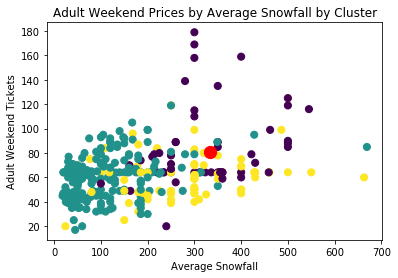

In [112]:
plt.scatter(df_ski['averageSnowfall'], df_ski['AdultWeekend'], c=df_ski['Clusters'], s=50, cmap='viridis', label ='clusters')
plt.scatter(df_bmr_f['averageSnowfall'], df_bmr_f['AdultWeekend'], c='red', s=150)
plt.xlabel('Average Snowfall')
plt.ylabel('Adult Weekend Tickets')
plt.title('Adult Weekend Prices by Average Snowfall by Cluster')
plt.savefig('fig3.png',bbox_inches='tight')

## Finalize Code

 Making sure our code is well organized and easy to follow is an important step. This is the time where you need to review the notebooks and python scripts you have created and clean them n=up so they are easy to follow and succinct in nature. Addtionally, we will also save our final model out a callable object using pickle for future use in a data pipeline.**<font color='teal'> Run the example code below to save out your callable model, notice we save it in the models folder we created in our previous guided capstone.</font>** 

In [14]:
#import pickle
#s = pickle.dumps(model)
#from joblib import dump, load
#dump(model, 'models/regression_model_adultweekend.joblib') 

## Finalize Documentation

For model documentation we want to save the model performance metrics as well as the features included in the final model. You could also save the model perfomance metrics and coefficients fo the other models you tried in case you want to refer to them later. **<font color='teal'> Create a dataframe containing the coefficients and the model performance metrics and save it out as a csv file then upload it to your github repository.</font>** 

In [96]:
metrics = {'Features':x.columns, 'Coefficients':lm.coef_}

In [100]:
df_metrics = pd.DataFrame(metrics)
df_metrics.head()

,Features,Coefficients
0,vertical_drop,0.713404
1,trams,0.203791
2,fastEight,-0.118878
3,fastSixes,0.291531
4,fastQuads,0.898182


In [101]:
df_metrics['Intercept']=lm.intercept_
df_metrics['Explained_Var'] = explained_variance_score(y_test, y_pred) 
df_metrics['Mean_Absolute_Error']=mean_absolute_error(y_test, y_pred)

In [103]:
df_metrics.to_csv('metrics.csv')